In [ ]:
!pip install fal-client

In [ ]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY


Original Image:


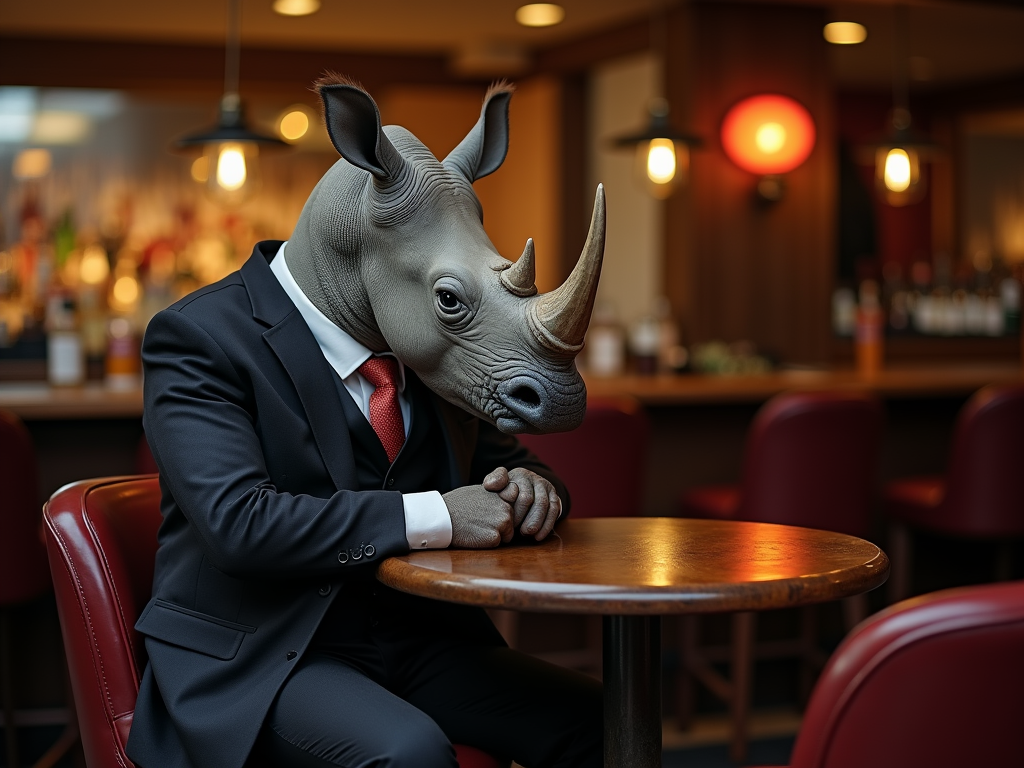

{'images': [{'url': 'https://fal.media/files/elephant/iokLlqZVlcxz1Qxg5lHpu_9aec9bfc3afe44aba712a2a2dbdbece2.jpg', 'width': 1024, 'height': 768, 'content_type': 'image/jpeg'}], 'timings': {}, 'seed': 1560892964, 'has_nsfw_concepts': [False], 'prompt': 'a pink rhino in a suit'}

After training:


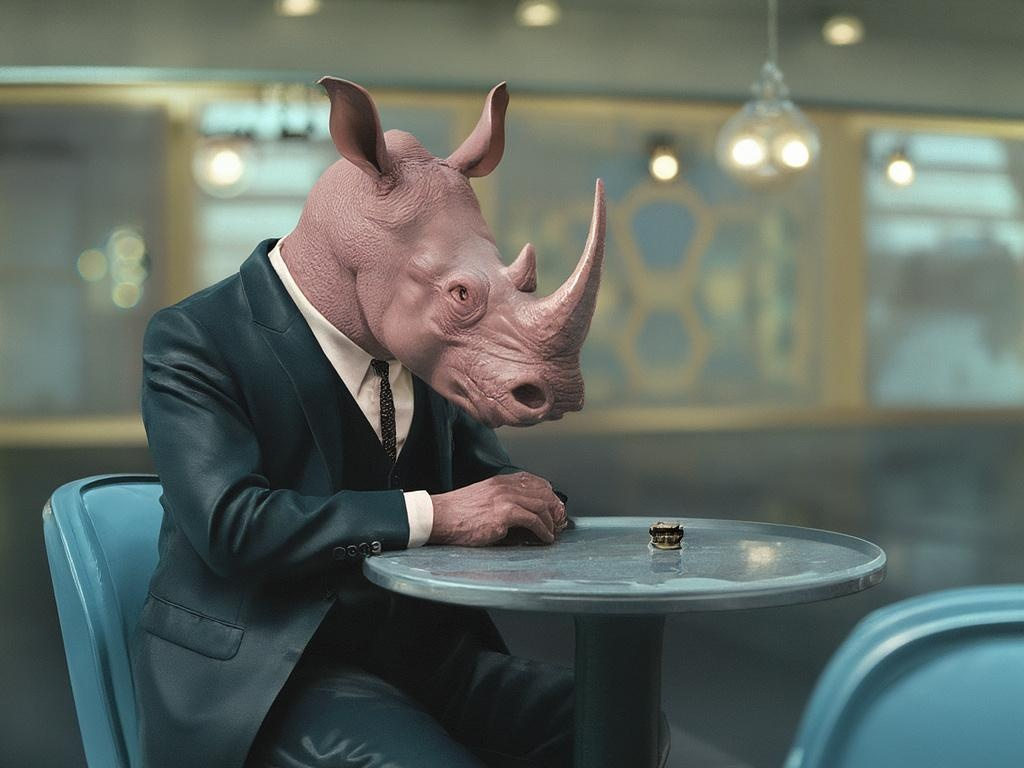

In [2]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

original_img = Image.open("rhino-suit.png")

image_url = fal_client.upload_file("rhino-suit.png")

print("\nOriginal Image:")
display(original_img)

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

prompt = "a pink rhino in a suit"

result = fal_client.subscribe(
    "fal-ai/flux-pro/v1/canny", 
    arguments={
        "prompt": prompt,
        "control_image_url": image_url,
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

print("\nAfter training:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)